# Distribuição Log-Normal

## Introdução

A distribuição log-normal, também conhecida como distribuição de Galton, é uma distribuição contínua em que, em vez da variável original $𝑋$, o logaritmo da variável $𝑋$, ou seja, $𝑌$, possui uma distribuição normal. A relação entre as variáveis aleatórias $𝑋$ e $𝑌$ pode ser descrita da seguinte forma:

$$
\ln X = Y
$$

Assim como a distribuição normal, a log-normal é descrita usando dois parâmetros, $\mu$ and $\sigma$. 

A seguir estão gráficos da função densidade de probabilidade log-normal para quatro valores de $\sigma$. Antes de prosseguir, tente responder às perguntas abaixo:

> Q1: O que acontece quando mantemos $\sigma$ constante e mudamos $\mu$?

> Q2: Quais os domínios de $\sigma$ e $\mu$?

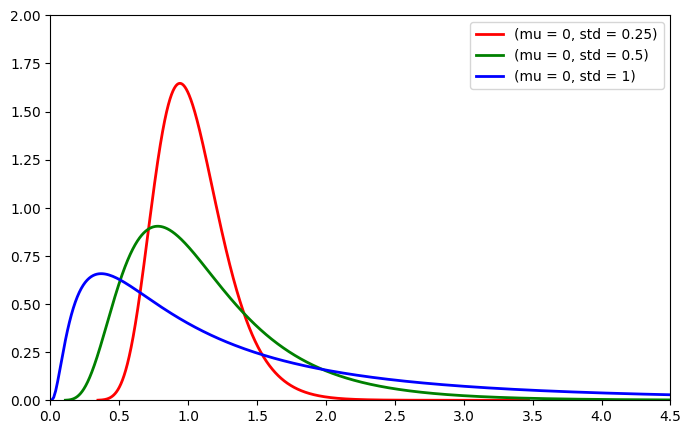

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

plt.figure(figsize=(8,5))
color = ['r', 'g', 'b']
color_index = 0
mu = [0]
std = [0.25, 0.5, 1]

for i in range(len(mu)):
    for j in range(len(std)):
        s = np.random.lognormal(mu[i], std[j], 100000)
        count, bins, ignored = plt.hist(s, 100, ec='k', density=True, alpha=0.0)
        x = np.linspace(min(bins), max(bins), 10000)
        pdf = (np.exp(-(np.log(x) - mu[i])**2 / (2 * std[j]**2)) / (x * std[j] * np.sqrt(2 * np.pi)))
        plt.plot(x, pdf, linewidth=2, color=color[color_index], label="(mu = "+ str(mu[i]) + ", std = "+ str(std[j]) + ")")
        color_index = color_index + 1
        
plt.legend(loc="upper right")
plt.axis([0, 4.5, 0, 2])
plt.show()

Você pode usar o gráfico interativo abaixo para responder às perguntas fornecidas na seção acima.

> Q3: O que acontece quando você define o valor de $\sigma$ como 0. Você consegue descobrir por que obteve esse resultado? A partir das propriedades que você explorou até agora, você consegue pensar em alguma aplicação da distribuição log-normal?

In [3]:
# pip install ipywidgets

     |████████████████████████████████| 139 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 19.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

mu = widgets.BoundedFloatText(
    value=1,
    min=0,
    max=30.0,
    step=0.01,
    description='Mean',
    disabled=False
)
sigma = widgets.BoundedFloatText(
    value=0.5,
    min=0,
    max=1.0,
    step=0.01,
    description='Sigma',
    disabled=False
)

def update_plot(mu, sigma):
    """
    This function is linked to the sliders and 
    it replots the log-normal when the sliders 
    are changed.
    """
    if sigma == 0:
        print("Divide by zero error. Look at the equation for the PDF in the next section to better understand this error.")
        return
    # Graph settings
    plt.figure(figsize=(8,5))
    plt.title('Log-normal graph:')
    
    s = np.random.lognormal(mu, sigma, 100000)
    count, bins, ignored = plt.hist(s, 100, ec='k', density=True, alpha=0.0)
    x = np.linspace(min(bins), max(bins), 1000)
    pdf_ca = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf_ca, linewidth=2, color='m', label="log-normal")
    plt.ylabel('PDF',fontsize=9)
    plt.xlabel('x',fontsize=9)
    plt.legend(loc="upper right")
    plt.show()

widgets.interactive(update_plot, mu=mu, sigma=sigma)

interactive(children=(BoundedFloatText(value=1.0, description='Mean', max=30.0, step=0.01), BoundedFloatText(v…

## Normal vs Log-Normal

Para entender melhor o log-normal e suas propriedades, esta seção compara a distribuição log-normal com a distribuição normal mais familiar.

A distribuição log-normal tem duas propriedades importantes, ou seja, é limitada inferiormente por zero e é distorcida para a direita, ao contrário de um gráfico de distribuição normal que tem inclinação zero e tem valores negativos e positivos (veja a figura abaixo). A assimetria é importante para determinar qual distribuição é mais apropriada para determinar a probabilidade de ocorrência do evento. Algumas aplicações populares do log-normal estão em áreas como análise de estoque, distribuição de renda, análise de confiabilidade e até mesmo em certas medidas fisiológicas como peso e pressão arterial, etc.

A seguir está uma comparação entre $PDF$ e $CDF$ de gráficos normais e log-normais para ajudar a visualizar como eles diferem.

Função de densidade de probabilidade (PDF)

A PDF do log-normal é ligeiramente diferente da distribuição normal,

$$
 f_Y(x)= \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

onde $\sigma$ é a derivação padrão e $\mu$ é a média da distribuição normal. Simplesmente tomando o logaritmo natural de $x$, a equação se torna log-normal:

$$
 f_X(x) = \frac{1}{x\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\ln x-\mu}{\sigma}) ^2}
$$

O $x$ no denominador é uma consequência da exigência de que a probabilidade cumulativa total permaneça a mesma entre as duas funções. É por causa dessa equação que quando você define $\sigma$ como zero que o gráfico interativo acima retorna um erro de "divisão por zero".

Abaixo está uma comparação das formas normal vs log-normal usando as equações PDF descritas acima:

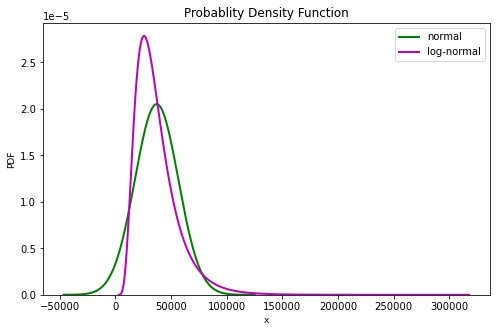

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

plt.figure(figsize=(8,5))

### PDF ###

# Normal: 
mu, sigma = 37055.25472, 19450.17473
s = np.random.normal(mu, sigma, 100000)
count, bins, ignored = plt.hist(s, 100, ec='k', density=True, alpha=0.0)
x = np.linspace(min(bins), max(bins), 10000)
pdf_ca = (np.exp(-0.5*(x - mu)**2 / (sigma**2)) / (sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf_ca, linewidth=2, color='g', label="normal")

# Log Normal:
ln_mu, ln_sigma = 10.3984899, 0.493306287
s = np.random.lognormal(ln_mu, ln_sigma, 100000)
count, bins, ignored = plt.hist(s, 100, ec='k', density=True, alpha=0.0)
x = np.linspace(min(bins), max(bins), 1000)
pdf_ca = (np.exp(-(np.log(x) - ln_mu)**2 / (2 * ln_sigma**2)) / (x * ln_sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf_ca, linewidth=2, color='m', label="log-normal")

# Graph settings
plt.title('Probablity Density Function')
plt.ylabel('PDF',fontsize=9)
plt.xlabel('x',fontsize=9)
plt.legend(loc="upper right")
plt.show()

## Função de distribuição acumulada (*Cumulative Density Function, CDF*) 

A CDF da distribuição normal,

$$
 F_Y(x) = \frac{1}{2} + \frac{1}{2}\text{erf}\Big(\frac{x-\mu}{\sigma \sqrt{2}}\Big)
$$

é simples comparado ao log-normal

$$
 F_X(x) = \frac{1}{2} + \frac{1}{2}\text{erf}\Big(\frac{\ln x-\mu}{\sigma \sqrt{2}}\Big)
$$

com $x$ sendo substituído por $\ln x$ e $\text{erf}$ refere-se à [função de erro](https://en.wikipedia.org/wiki/Error_function).

A seguir está uma comparação gráfica das CDF das duas distribuições usando as equações fornecidas acima:

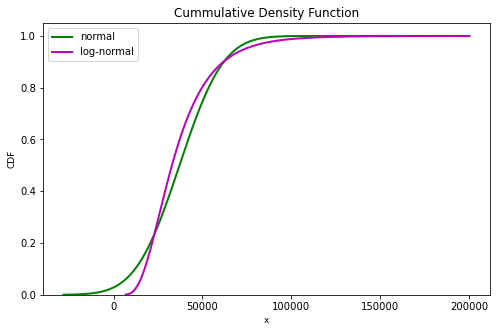

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

plt.figure(figsize=(8,5))

### CDF ###


# Normal: 
mu, sigma = 37055.25472, 19450.17473
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, ec='k', density=True)
x = np.linspace(min(bins), 200000, 1000)
cdf = (1+special.erf((x-mu)/np.sqrt(2*sigma**2)))/2
plt.plot(x, cdf, linewidth=2, color='g', label="normal")

# Log Normal:
ln_mu, ln_sigma = 10.3984899, 0.493306287
s = np.random.lognormal(ln_mu, ln_sigma, 1000)
count, bins, ignored = plt.hist(s, 100, ec='k', density=True)
x = np.linspace(min(bins), 200000, 1000)
cdf = (1+special.erf((np.log(x)-ln_mu)/(np.sqrt(2)*ln_sigma)))/2
plt.plot(x, cdf, linewidth=2, color='m', label="log-normal")

# Graph settings
plt.title('Cummulative Density Function')
plt.ylabel('CDF',fontsize=9)
plt.xlabel('x',fontsize=9)
plt.legend(loc="upper left")
plt.show()

## Aplicação: Distribuição de riquezas

Para entender melhor a distribuição log-normal, vamos usar o exemplo da distribuição da riqueza em 9 países industrializados.

Antes de prosseguir, com base no conhecimento que você adquiriu até agora e no gráfico abaixo, qual país você acha que tem o maior desvio padrão? O gráfico do México tem um pico mais elevado, mas uma largura de curva menor em comparação com a Itália. O que isso nos diz sobre a distribuição da riqueza nesses dois países? Na sua opinião, qual país parece estar em melhor situação socio-econômica?

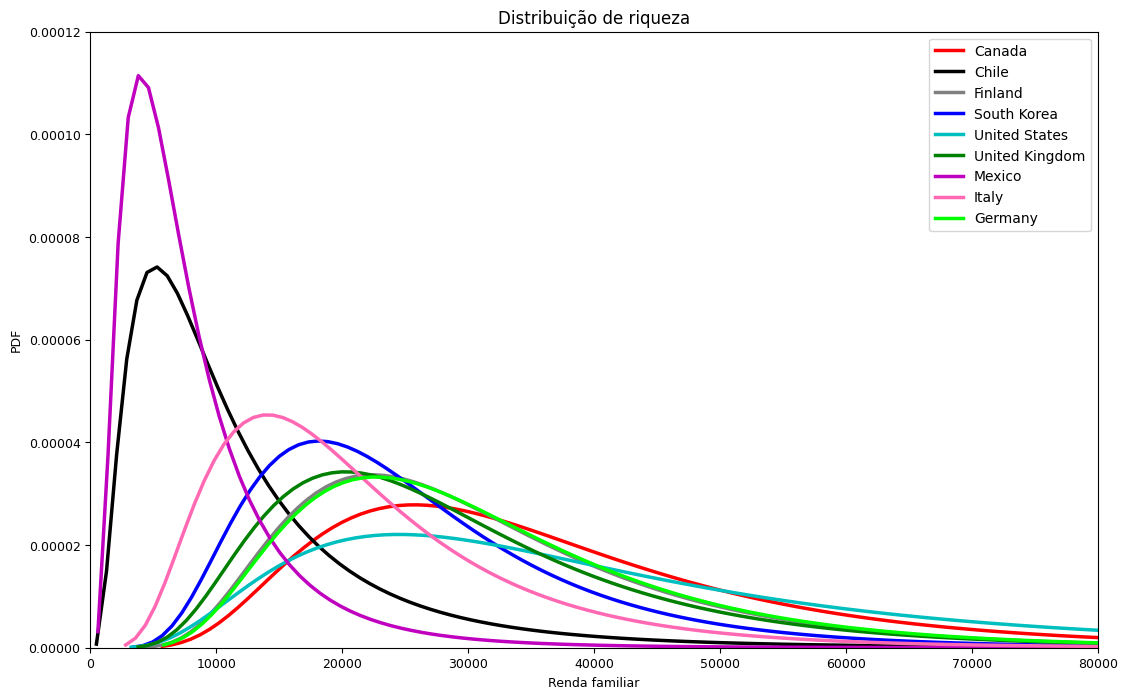

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))

# Data collected from World Bank.
color = ['r', 'k', 'gray', 'b', 'c', 'g', 'm', 'hotpink', 'lime', 'y']
countries = ['Canada', 'Chile', 'Finland', 'South Korea', 'United States', 'United Kingdom', 'Mexico', 'Italy', 'Germany']
mu_countries = [10.3984899, 9.14558636, 10.24047662, 10.04203869, 10.48117837, 10.17196315, 8.781295311, 9.843113525, 10.25328085]
sigma_countries = [0.493306287, 0.773320443, 0.472658046, 0.4850775, 0.611671832, 0.505692298, 0.702435424, 0.540310432, 0.472658046]

for i in range(len(countries)):
    s = np.random.lognormal(mu_countries[i], sigma_countries[i], 10000)
    count, bins, ignored = plt.hist(s, 100, ec='k', density=True, alpha=0.0)
    x = np.linspace(min(bins), 80000, 100)
    pdf = (np.exp(-(np.log(x) - mu_countries[i])**2 / (2 * sigma_countries[i]**2)) / (x * sigma_countries[i] * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2.5, color=color[i], label=countries[i])

# Graph settings
plt.title('Distribuição de riqueza')
plt.ylabel('PDF',fontsize=9)
plt.xlabel('Renda familiar',fontsize=9)
plt.tick_params(axis='both',labelsize=9)
plt.axis([0, 80000, 0, 0.00012])
plt.legend(loc='upper right')
plt.show()

Para responder às perguntas acima, quanto maior o pico do gráfico, maior será a população com aquela riqueza específica. Assim, no caso do México, uma vez que o gráfico atinge o pico muito mais cedo e mais alto do que o gráfico da Itália, a riqueza média da maioria das pessoas no México é inferior à da Itália. A Itália também tem uma curva mais larga, o que nos diz que a riqueza nesse país está mais distribuída, em vez de apenas alguns ricos controlarem a riqueza de todo o país.

A breve análise acima nos mostra quão poderosas podem ser as visualizações do log-normal. Apenas olhando para os gráficos acima podemos fazer suposições sobre a riqueza média da população e como está distribuída a riqueza do país.

Sabia que a desigualdade econômica leva a maiores problemas de saúde e sociais e pode dificultar enormemente o crescimento econômico e também resulta numa menor taxa de felicidade e satisfação na população em geral? (Fonte: [Wikipedia](https://en.wikipedia.org/wiki/Effects_of_economic_inequality))

### Respostas:

> Q1: Quando $\mu$ é constante e $\sigma$ é aumentado, o pico do gráfico diminui. Isso ocorre porque o $\sigma$ é inversamente proporcional à densidade de probabilidade de $x$.

> Q2: $\mu$ $>= 0$ e $\sigma > 0$ (Ver PDF).

> Q3: Quando $\sigma = 0$ o PDF = $\infty$ (Veja a equação da PDF).